In [1]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib.pyplot
!pip3 install seaborn

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
## Read CSV

file_path = '/Users/yuhngtan/Desktop/YH-DAC-Curriculum/DAC-002_EDA/Netflix_Userbase.csv'

df = pd.read_csv(file_path)



In [8]:
# Check if got null values to clean 
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [9]:
# What subscriptions are there ?
subscription_count = df['Subscription Type'].value_counts()
print(subscription_count)

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64


In [14]:
#  Is it a monthly subscription? Or yearly?
plan_duration = df['Plan Duration'].value_counts()
print(plan_duration)

Plan Duration
1 Month    2500
Name: count, dtype: int64


In [18]:
# What are the different prices of the subscriptions?

monthly_revenue_count = df["Monthly Revenue"].value_counts()
print(monthly_revenue_count)


Monthly Revenue
12    455
14    431
13    418
10    409
15    399
11    388
Name: count, dtype: int64


In [19]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


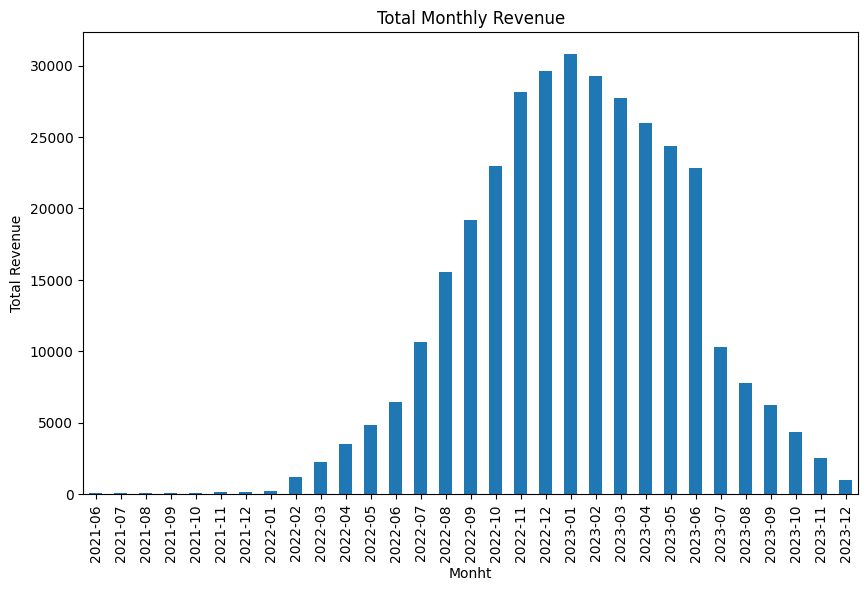

In [6]:
# Sales per month
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])   

monthly_revenue_rows = []

for i, row in df.iterrows():
    month_range = pd.date_range(row['Join Date'], row['Last Payment Date'], freq = 'MS').to_period('M')

    for month in month_range: 
        monthly_revenue_rows.append({
            'Month': month,
            'Monthly Revenue': row['Monthly Revenue']
        })

monthly_revenue_df = pd.DataFrame(monthly_revenue_rows)

total_monthly_revenue = monthly_revenue_df.groupby('Month')['Monthly Revenue'].sum()


total_monthly_revenue.plot(kind='bar', figsize=(10, 6), title='Total Monthly Revenue')
plt.xlabel('Monht')
plt.ylabel('Total Revenue')

plt.show()


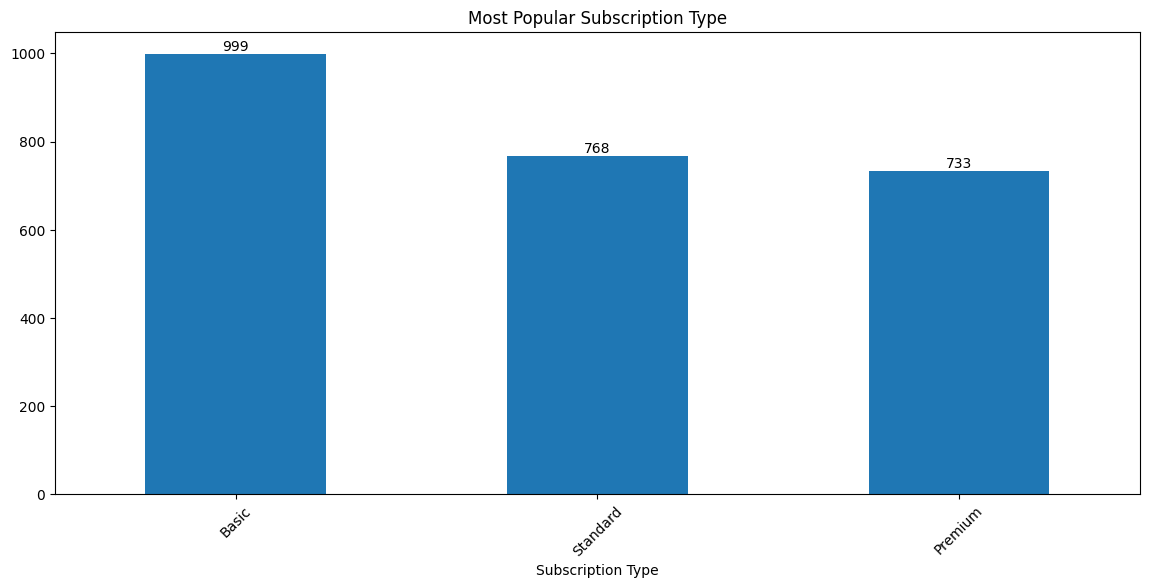

In [22]:
# Most Popular Subscription Type 

ax = df['Subscription Type'].value_counts().plot(kind = 'bar', title = 'Most Popular Subscription Type')
plt.rcParams['figure.figsize'] = (14, 6)
plt.xticks(rotation = 45)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

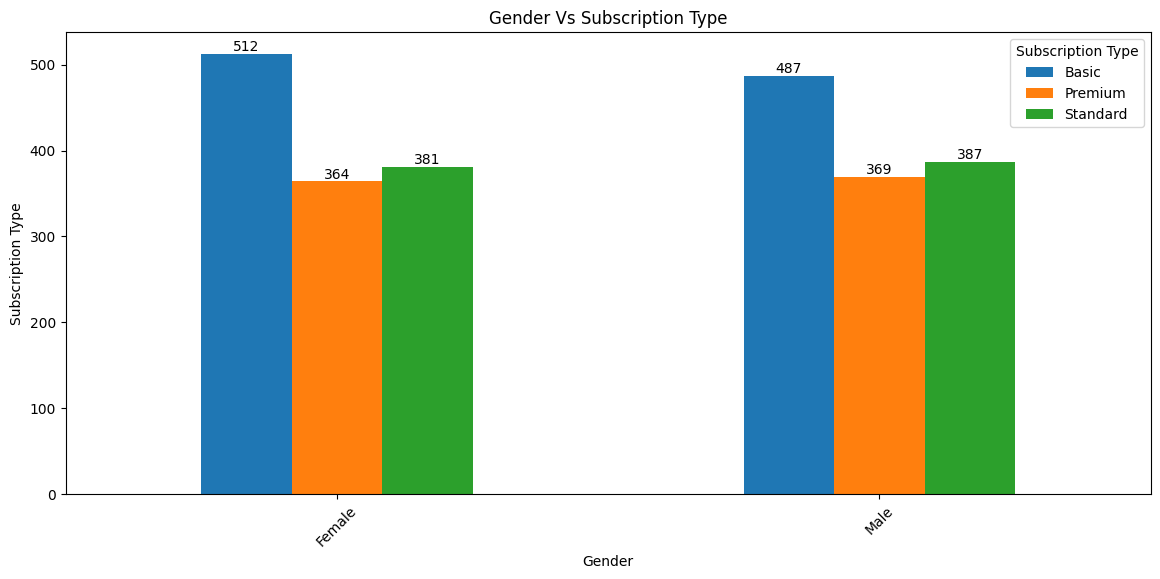

In [23]:
# Gender VS Subscription Type

gender_subscription = pd.crosstab(df['Gender'], df['Subscription Type'])

ax = gender_subscription.plot(kind = 'bar', figsize = (14,6))

plt.title("Gender Vs Subscription Type")
plt.xlabel('Gender')
plt.ylabel('Subscription Type')

plt.xticks(rotation = 45)

for p in ax.patches: 
    ax.annotate(f'{p.get_height()}', (p.get_x()+ p.get_width( )/ 2, p.get_height()), ha = 'center', va = 'bottom')

plt.show()

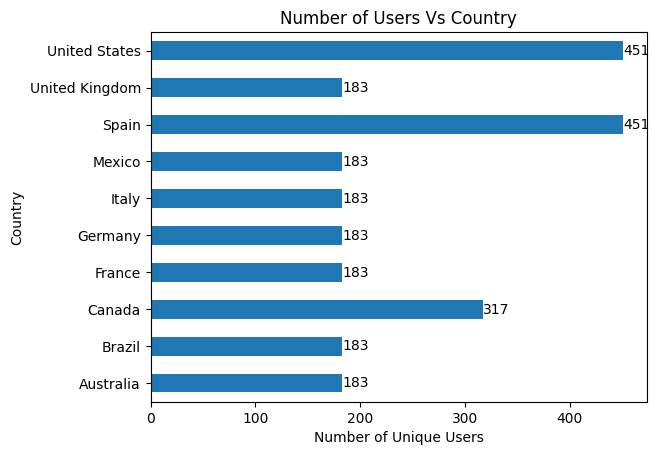

In [5]:
# Number of Users VS Country
unique_users_per_country = df.groupby('Country')['User ID'].nunique()

ax = unique_users_per_country.plot(kind='barh', title='Number of Users Vs Country')

plt.xlabel('Number of Unique Users')
plt.ylabel('Country')

plt.rcParams['figure.figsize'] = (14, 6)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

# Show the plot
plt.show()
